# Notebook: E-handelsplattformen (Grupp 1: Daniel, Hamed, Martin W)

Vi är ett team som analyserar försäljningsdata från en påhittad e-handelsplattform.  
Vi ska ge ledningen ett snabbt beslutsunderlag inför nästa kampanjperiod.

Datasetet innehåller:
- `order_id`
- `date`
- `city`
- `category`
- `price`
- `units`
- `revenue`

In [1]:
# För att få relative path utifrån notebookens workspace mapp.
import sys, os 
sys.path.append(os.path.abspath(".."))

In [2]:
# Läs in data
from src.io_utils import load_csv
df = load_csv("../data/ecommerce_sales.csv")
# Kolla 2 rader
df.head(2)

,order_id,date,city,category,price,units,revenue
0,100000,2024-04-19,Stockholm,Sports,530.95,4,2123.80
1,100001,2024-05-06,Malmö,Sports,653.28,3,1959.84


In [3]:
# Importera funktioner 
from src.metrics import total_revenue, total_units, aov, revenue_by_category, revenue_by_city, top_categories, median_revenue, standard_deviation
import pandas as pd

---

Vi ska svara följande affärsfrågor:
1. Vad säljer? – Vilka kategorier driver mest intäkt?  
2. Var säljer vi? – Vilka städer står för störst intäkt?  
3. När säljer vi? – Finns säsongsmönster i försäljningen?  
4. Hur ser en typisk order ut? – AOV (Average Order Value).  
5. Topp-3 kategorier efter intäkt.  
6. Eventuella avvikelser.  

In [4]:
# Visa metrics
print("Total Revenue:", total_revenue(df))
print("Total Units Sold:", total_units(df))
print("Average Order Value (AOV):", aov(df))

print("\nRevenue by Category:\n", revenue_by_category(df))
print("\nRevenue by City:\n", revenue_by_city(df))
print("\nTop Categories:\n", top_categories(df))
print("\nMedian Revenue:\n", median_revenue(df))
print("\nStandard deviation:\n", standard_deviation(df))

Total Revenue: 3502767.2300000004
Total Units Sold: 7463
Average Order Value (AOV): 469.351096073965

Revenue by Category:
 category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Home            511070.87
Beauty          163053.97
Toys            143015.99
Name: revenue, dtype: float64

Revenue by City:
 city
Stockholm    1227201.94
Göteborg      859019.65
Malmö         567926.32
Uppsala       551478.42
Västerås      297140.90
Name: revenue, dtype: float64

Top Categories:
 category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Name: revenue, dtype: float64

Median Revenue:
 1088.69

Standard deviation:
 1166.9449674375871


In [5]:
# Beskriva ovan...

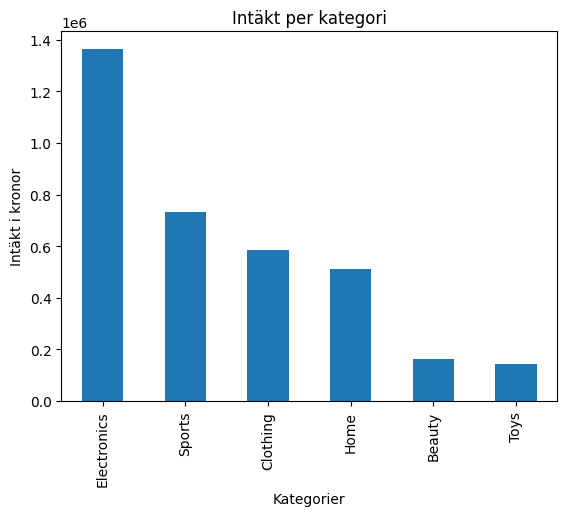

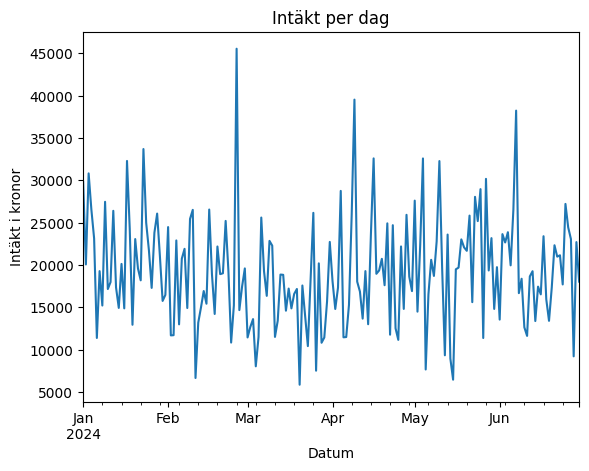

In [6]:
# Visualizations
from src.viz import plot_revenue_by_category, plot_sales_over_time

fig1, ax1 = plot_revenue_by_category(df)
fig2, ax2 = plot_sales_over_time(df)

In [7]:
# beskriva ovan..

In [8]:
q1 = df["revenue"].quantile(0.25)
q3 = df["revenue"].quantile(0.75)
iqr = q3 - q1
high_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
temp = df[df['revenue'] > high_bound]
len(temp)

111

In [9]:
# Anekdot: vi kan titta på z-score istället för IQR outliers.
z = (df['revenue'] - df['revenue'].mean()) / df['revenue'].std()
z

0       0.619304
1       0.478800
2      -0.590591
3      -0.304553
4       0.797041
          ...   
2495   -0.824329
2496   -0.622829
2497   -0.264029
2498    1.017060
2499    0.017467
Name: revenue, Length: 2500, dtype: float64

Total Revenue: 3502767



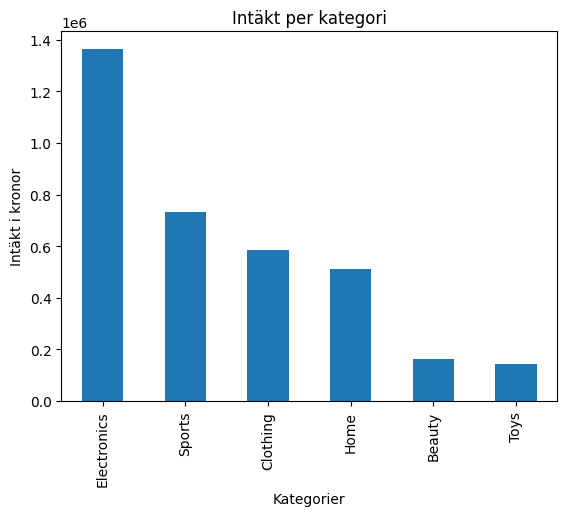

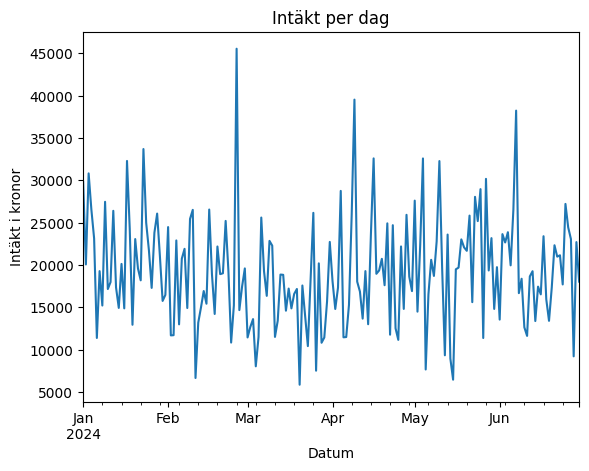

In [10]:
# Vi testar nu dataklassen vi skapat i ecommerce.py
from src.ecommerce import Analyzer

TEMP = Analyzer(df)
TEMP.compute_all_calculations()
TEMP.make_the_plots()
print(TEMP.summary())

---